<h2> Introduction </h2>

The CRISP-DM Process (Cross Industry Process for Data Mining) is a standard process while dealing with data science problems across the industry. In this project, we will try to answer some fundamental questions about Seattle AirBnB data, while keeping in mind below standards in the CRISP-DM process.

**1.Business Understanding**

**2.Data Understanding**

**3.Prepare Data**

**4.Data Modeling**

**5.Evaluate the Results**

**6.Deploy**

Inspired by : http://insideairbnb.com/behind.html

<h3>Business Understanding....Questions to ask? </h3>

<h4>Availability Analysis</h4>

An Airbnb host can setup a calendar for their listing so that it is only available for a few days or weeks a year.
listings are available all year round (except for when it is already booked).
We will try to analyze below points here in regards to Availability.

>1. What percent of listings are highly available throughout the year? We will consider a metric of 60% as the measure of high availability.
>2. How the listings are distributed across number of days? Are there more number of available listings? What could be the
reason behind that?

<h4>Time Series and Engagement Analysis</h4>

>1. What are the busiest times of the year to visit Seattle? 
>2. Which day is the busiest of all the days?
>3. Which months show most visitors in the area?

<h4>Pricing Analysis </h4>

>1. How much do people charge to rent their homes (on average, minimum, maximum)? 
>2. How the price changes in those busy schedules?

<h3>Data Understanding....A look at the data </h3>

In [123]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline
import seaborn as sns

In [124]:
#importing the datasets into a pandas dataframe for analysis
seattle_listings = pd.read_csv('listings.csv')
seattle_calendars = pd.read_csv('calendar.csv')

In [125]:
seattle_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [126]:
#checking the number of rows and columns in the dataset.
n_rows = seattle_listings.shape[0]
n_cols = seattle_listings.shape[1]

print("There are {} rows and {} columns in the dataset!".format(n_rows, n_cols))

There are 3818 rows and 92 columns in the dataset!


In [127]:
#checking for duplicates in the data
seattle_listings.duplicated().sum()

0

In [128]:
#checking for columns without any null values in the listing data.
no_nulls=[]
for col in seattle_listings.columns:
    if seattle_listings[col].isnull().sum() == 0:
        no_nulls.append(col)
print("There are total {} columns in the dataset, and {} columns don't have any null values." \
     .format(n_cols, len(no_nulls)))

There are total 92 columns in the dataset, and 47 columns don't have any null values.


<h3>Preparing the data to answer business questions ...</h3>

In [129]:
#checking if some columns have more than 90% missing values, we will consider dropping them.
heavy_nulls = []
for col in seattle_listings.columns:
    if col not in no_nulls:
        if (seattle_listings[col].isnull().sum()/ seattle_listings[col].shape[0])*100 >= 90:
            heavy_nulls.append(col)
print(heavy_nulls)

['square_feet', 'license']


In [130]:
#dropping the columns with > 90% null values, also looking at them, they won't be considered in our analysis
seattle_listings = seattle_listings.drop(heavy_nulls, axis=1)

In [131]:
#checking object type and non-object type columns for the dataset
object_types = []
numeric_types = []
for col in seattle_listings.columns:
    if seattle_listings[col].dtype == object:
        object_types.append(col)
    else:
        numeric_types.append(col)
print("String columns are :")
print(object_types)

String columns are :
['listing_url', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'is_location_exact', 'property_type', 'room_type', 'bed_type', 'amenities', 'price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'extra_people', 'calendar_updated', 'has_availability', 'calendar_last_scraped', 'first_review', 'last_review', 'requires_license', 'jurisdiction_names', '

In [132]:
print("Numeric columns are :")
print(numeric_types)

Numeric columns are :
['id', 'scrape_id', 'host_id', 'host_listings_count', 'host_total_listings_count', 'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'guests_included', 'minimum_nights', 'maximum_nights', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'calculated_host_listings_count', 'reviews_per_month']


In [133]:
# changing the datatype for 'price', 'weekly_price', 'monthly_price', 'security_deposit',
seattle_listings[['price', 'monthly_price', 'weekly_price', 'security_deposit']].head()

,price,monthly_price,weekly_price,security_deposit
0,$85.00,NaN,NaN,NaN
1,$150.00,"$3,000.00","$1,000.00",$100.00
2,$975.00,NaN,NaN,"$1,000.00"
3,$100.00,"$2,300.00",$650.00,NaN
4,$450.00,NaN,NaN,$700.00


In [134]:
#replacing the "$" in the values, and converting the columns into numeric
seattle_listings.price = seattle_listings.price.apply(lambda x: pd.to_numeric(str(x).replace(',',"").replace('$',""), errors='coerce'))
seattle_listings.monthly_price = seattle_listings.monthly_price.apply(lambda x : pd.to_numeric(str(x).replace(',',"").replace('$',""),errors='coerce'))
seattle_listings.weekly_price = seattle_listings.weekly_price.apply(lambda x : pd.to_numeric(str(x).replace(',',"").replace('$',""),errors='coerce'))
seattle_listings.security_deposit = seattle_listings.security_deposit.apply(lambda x : pd.to_numeric(str(x).replace(',',"").replace('$',""),errors='coerce'))

In [135]:
# changing the datatype for 'price', 'weekly_price', 'monthly_price', 'security_deposit',
seattle_listings[['price', 'monthly_price', 'weekly_price','security_deposit']].head()

,price,monthly_price,weekly_price,security_deposit
0,85.0,NaN,NaN,NaN
1,150.0,3000.0,1000.0,100.0
2,975.0,NaN,NaN,1000.0
3,100.0,2300.0,650.0,NaN
4,450.0,NaN,NaN,700.0


In [136]:
#Again checking object type and non-object type columns for the dataset
object_types = []
numeric_types = []
for col in seattle_listings.columns:
    if seattle_listings[col].dtype == object:
        object_types.append(col)
    else:
        numeric_types.append(col)
print("String columns are : \n")
print(object_types),
print("\n")
print("Numeric columns are :\n \n {}".format(numeric_types))

String columns are : 

['listing_url', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'is_location_exact', 'property_type', 'room_type', 'bed_type', 'amenities', 'cleaning_fee', 'extra_people', 'calendar_updated', 'has_availability', 'calendar_last_scraped', 'first_review', 'last_review', 'requires_license', 'jurisdiction_names', 'instant_bookable', 'cancellation_policy', 'require_guest_pro

In [137]:
#Let's analyse the columns having null values, we will then decide which columns to clean based on our interest.
missing_vals =dict()
for col in seattle_listings.columns:
    if col not in no_nulls:
        missing_vals[col] = round((seattle_listings[col].isnull().sum()/ seattle_listings[col].shape[0])*100,2)
missing_val_df = pd.DataFrame(list(missing_vals.items()), columns=['column', 'missing_per']).sort_values(by = "missing_per", ascending= False)
missing_val_df.head(10)

,column,missing_per
30,monthly_price,60.27
31,security_deposit,51.13
29,weekly_price,47.38
3,notes,42.06
2,neighborhood_overview,27.03
32,cleaning_fee,26.98
4,transit,24.46
11,host_about,22.50
14,host_acceptance_rate,20.25
38,review_scores_checkin,17.23


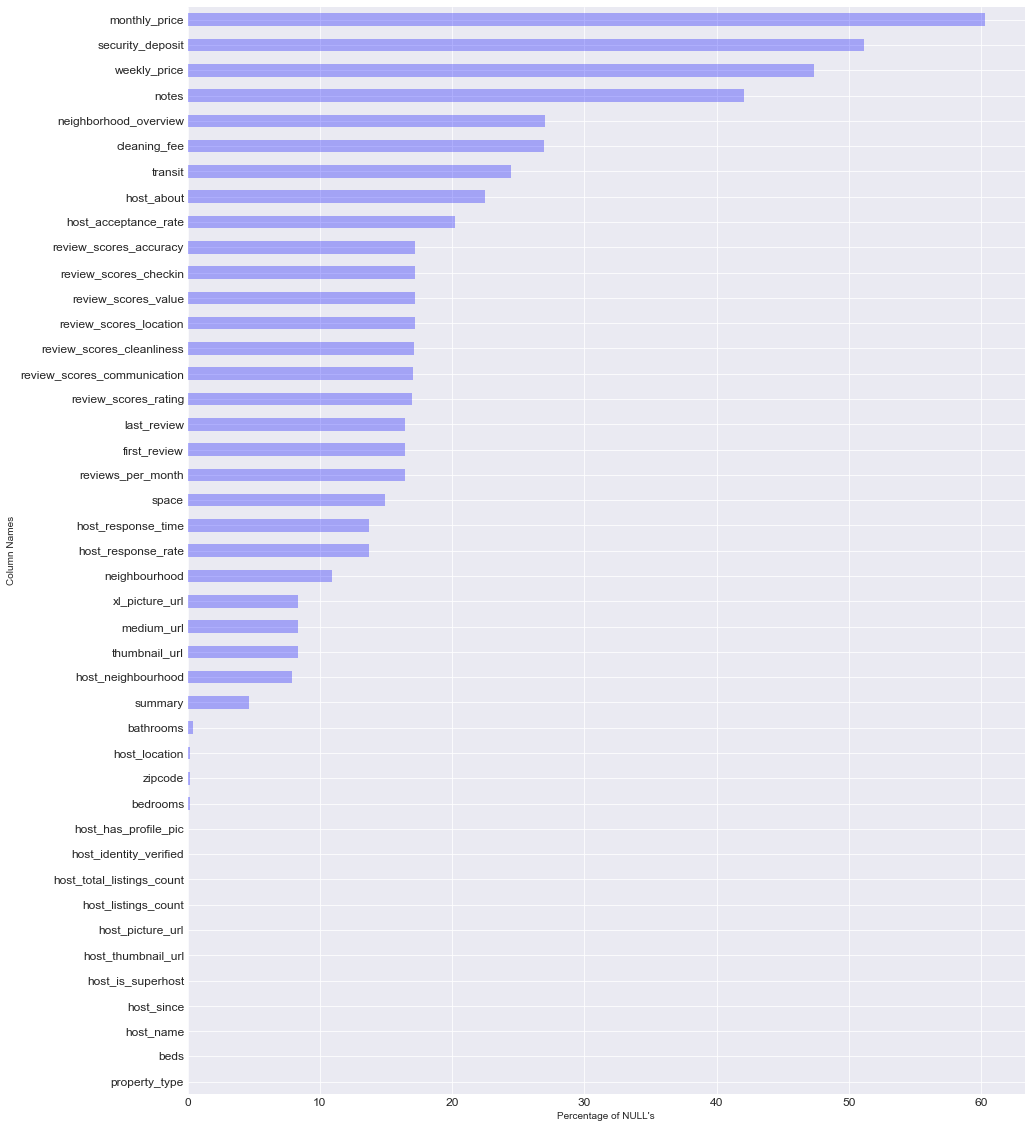

In [138]:
#visualising the above dataframe to see the columns with most number of missing values
missing_val_df.set_index('column')['missing_per'].sort_values(ascending=True).plot.barh(figsize=(15,20),fontsize=12, color = 'blue',alpha =0.3);
plt.xlabel("Percentage of NULL's")
plt.ylabel("Column Names")
plt.show()

> There are a lot of nulls in the price related columns, that we might be intrested in. But, we will work with the price
column available in the calendar data, so we can simply impute them.

In [139]:
#we will impute the null values for numeric columns using forward and backward fill imputation method.
listing_data_num=seattle_listings[numeric_types]
listing_data_num.head()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
0,241032,20160104002432,956883,3.0,3.0,47.636289,-122.371025,4,1.0,1.0,...,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,2,4.07
1,953595,20160104002432,5177328,6.0,6.0,47.639123,-122.365666,4,1.0,1.0,...,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,6,1.48
2,3308979,20160104002432,16708587,2.0,2.0,47.629724,-122.369483,11,4.5,5.0,...,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,2,1.15
3,7421966,20160104002432,9851441,1.0,1.0,47.638473,-122.369279,3,1.0,0.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,278830,20160104002432,1452570,2.0,2.0,47.632918,-122.372471,6,2.0,3.0,...,38,92.0,9.0,9.0,10.0,10.0,9.0,9.0,1,0.89


In [140]:
listing_data_num.isnull().sum().sort_values()

id                                   0
number_of_reviews                    0
availability_365                     0
availability_90                      0
availability_60                      0
availability_30                      0
maximum_nights                       0
minimum_nights                       0
calculated_host_listings_count       0
price                                0
guests_included                      0
host_id                              0
scrape_id                            0
accommodates                         0
longitude                            0
latitude                             0
beds                                 1
host_listings_count                  2
host_total_listings_count            2
bedrooms                             6
bathrooms                           16
reviews_per_month                  627
review_scores_rating               647
review_scores_communication        651
review_scores_cleanliness          653
review_scores_location   

In [141]:
#applying forward and backward fill to impute the null numeric values
listing_data_num=listing_data_num.fillna(method='ffill').fillna(method='bfill')
listing_data_num.isnull().sum()

id                                0
scrape_id                         0
host_id                           0
host_listings_count               0
host_total_listings_count         0
latitude                          0
longitude                         0
accommodates                      0
bathrooms                         0
bedrooms                          0
beds                              0
price                             0
weekly_price                      0
monthly_price                     0
security_deposit                  0
guests_included                   0
minimum_nights                    0
maximum_nights                    0
availability_30                   0
availability_60                   0
availability_90                   0
availability_365                  0
number_of_reviews                 0
review_scores_rating              0
review_scores_accuracy            0
review_scores_cleanliness         0
review_scores_checkin             0
review_scores_communication 

In [142]:
listing_data_num.head()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
0,241032,20160104002432,956883,3.0,3.0,47.636289,-122.371025,4,1.0,1.0,...,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,2,4.07
1,953595,20160104002432,5177328,6.0,6.0,47.639123,-122.365666,4,1.0,1.0,...,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,6,1.48
2,3308979,20160104002432,16708587,2.0,2.0,47.629724,-122.369483,11,4.5,5.0,...,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,2,1.15
3,7421966,20160104002432,9851441,1.0,1.0,47.638473,-122.369279,3,1.0,0.0,...,0,97.0,10.0,10.0,10.0,10.0,10.0,10.0,1,1.15
4,278830,20160104002432,1452570,2.0,2.0,47.632918,-122.372471,6,2.0,3.0,...,38,92.0,9.0,9.0,10.0,10.0,9.0,9.0,1,0.89


In [143]:
#dropping the numerical columns from the original dataframe and then merging with the non-null dataframe
for col in numeric_types:
    if col != 'id':
        seattle_listings=seattle_listings.drop(col, axis =1)

In [145]:
#we can see only object type columns are available now
seattle_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 59 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498 non-null object
host_url                            381

In [146]:
#merging with the non-null dataframe
seattle_listings_clean = pd.merge(seattle_listings, listing_data_num, how="inner", on ="id")

In [147]:
#checking the dataframe
seattle_listings_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3818 entries, 0 to 3817
Data columns (total 90 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498 non-null object
host_url                            381

In [148]:
#let's work with the seattle calendars data frame. This dataframe gives us some factual information about the listings in
#seattle area.
seattle_calendars.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [149]:
#no of unique listings
seattle_calendars.listing_id.nunique()

3818

In [150]:
#no. of listings available, not available
seattle_calendars.available.value_counts()

t    934542
f    459028
Name: available, dtype: int64

In [151]:
#convert the price to numeric following same approach
seattle_calendars.price = seattle_calendars.price.apply(lambda x: pd.to_numeric(str(x).replace(',',"").replace('$',""), errors='coerce'))

In [152]:
seattle_calendars.head(2)

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0


In [153]:
#convert the data column from object to datetime
seattle_calendars.date=pd.to_datetime(seattle_calendars['date'],format='%Y-%m-%d')

In [154]:
#extracting Year, Month and Day from the date column
seattle_calendars['year']= seattle_calendars.date.dt.strftime("%Y")
seattle_calendars['month']=seattle_calendars.date.dt.strftime("%B")
seattle_calendars['day_of_week']=seattle_calendars.date.dt.strftime("%A")

In [155]:
#checking the results
seattle_calendars.head(10)

,listing_id,date,available,price,year,month,day_of_week
0,241032,2016-01-04,t,85.0,2016,January,Monday
1,241032,2016-01-05,t,85.0,2016,January,Tuesday
2,241032,2016-01-06,f,NaN,2016,January,Wednesday
3,241032,2016-01-07,f,NaN,2016,January,Thursday
4,241032,2016-01-08,f,NaN,2016,January,Friday
5,241032,2016-01-09,f,NaN,2016,January,Saturday
6,241032,2016-01-10,f,NaN,2016,January,Sunday
7,241032,2016-01-11,f,NaN,2016,January,Monday
8,241032,2016-01-12,f,NaN,2016,January,Tuesday
9,241032,2016-01-13,t,85.0,2016,January,Wednesday


<h3>Data Analysis and Modelling </h3>

>In this section we are going to, use our cleaned data, to try and answer the questions we already set up.

In [156]:
#let's check the overall availability of the listings
available_listings=seattle_calendars.groupby(["available"]).count()['listing_id'].reset_index()
available_listings.rename(columns = {"listing_id":"counts"}, inplace=True)
available_listings['avail_percent'] = available_listings.counts/sum(available_listings.counts)
available_listings

,available,counts,avail_percent
0,f,459028,0.32939
1,t,934542,0.67061


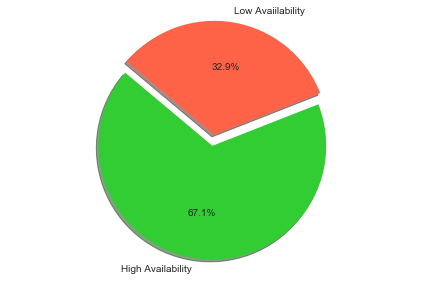

In [157]:
labels = ['High Availability', 'Low Avaiilability']
sizes = [available_listings["avail_percent"][1],available_listings["avail_percent"][0] ]
colors = ['limegreen', 'tomato']
explode = (0.1, 0)
plt.pie(sizes, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140, explode=explode, labels=labels)
plt.axis('equal')
plt.tight_layout()
plt.show()

>As we can see, out of all the listings, 67% are available throughout the year, and 33% are mostly occuiped.

>Entire homes or apartments highly available year-round for tourists, probably don't have the owner present, could be 
illegal, and more importantly, are displacing residents.

In [166]:
#Let's create a dataframe with listing and their avaliability
listing_availability = pd.DataFrame(seattle_calendars.query('available == "t"').groupby(['listing_id'])['date'].count().reset_index())
listing_availability.columns = ['listing_id','no_of_days_available']

In [167]:
#let's check mostly available listings
listing_availability['per_available'] = listing_availability['no_of_days_available']/365
listing_availability = listing_availability.sort_values(by=["no_of_days_available", "per_available"], ascending=False)
listing_availability.head(10)

,listing_id,no_of_days_available,per_available
1,4291,365,1.0
3,6606,365,1.0
5,9419,365,1.0
10,10385,365,1.0
11,10695,365,1.0
12,11012,365,1.0
13,11411,365,1.0
30,26116,365,1.0
42,51826,365,1.0
43,52525,365,1.0


>This are top 10 highly available listing. These listings are available throughout the year. This is strange and needs
investigation.

In [175]:
listing_info = ['id','host_location','last_scraped', 'host_identity_verified','host_neighbourhood','reviews_per_month','review_scores_rating', 'city']
top_available = np.array(listing_availability.head(20).listing_id)

availability_analysis = seattle_listings_clean[seattle_listings_clean.id.isin(top_occupied)][listing_info].sort_values(by=["reviews_per_month", "review_scores_rating" ])

In [176]:
availability_analysis

,id,host_location,last_scraped,host_identity_verified,host_neighbourhood,reviews_per_month,review_scores_rating,city
2795,4906490,"Seattle, Washington, United States",2016-01-04,f,NaN,0.20,100.0,Seattle
2946,7874053,"Seattle, Washington, United States",2016-01-04,f,Capitol Hill,0.26,97.0,Seattle
2939,3819831,"Seattle, Washington, United States",2016-01-04,t,Capitol Hill,0.31,92.0,Seattle
707,6007267,"Seattle, Washington, United States",2016-01-04,t,University District,0.43,100.0,Seattle
2550,656909,"Seattle, Washington, United States",2016-01-04,t,Bryant,0.56,96.0,Seattle
2738,9843421,"Seattle, Washington, United States",2016-01-04,t,Capitol Hill,0.62,98.0,Seattle
525,9868607,"Seattle, Washington, United States",2016-01-04,t,Green Lake,0.65,94.0,Seattle
1611,7828222,"Seattle, Washington, United States",2016-01-04,f,First Hill,0.67,93.0,Seattle
1255,9371895,"Seattle, Washington, United States",2016-01-04,t,Belltown,0.75,100.0,Seattle
2911,9149612,"Seattle, Washington, United States",2016-01-04,t,Capitol Hill,0.87,84.0,Seattle


In [177]:
#we can see the average review scores and average reviews per month for these listings
availability_analysis[['reviews_per_month', 'review_scores_rating']].describe()

,reviews_per_month,review_scores_rating
count,20.000000,20.000000
mean,1.090000,95.100000
std,0.906503,6.256786
min,0.200000,75.000000
25%,0.605000,93.750000
50%,0.925000,96.000000
75%,1.107500,100.000000
max,3.750000,100.000000


> We can see the mean review score and reviews per month is quite low. Also 75% of the listings has only 1.1 reviews or fewer per month. The standard deviation for review_scores_rating is also quite high.

In [178]:
#Let's create a dataframe with listing and their occupancy
#we will do similar analysis for occupancy
occupancy = pd.DataFrame(seattle_calendars.query('available == "f"').groupby(['listing_id'])['date'].count().reset_index())
occupancy.columns = ['listing_id','no_of_days_occupied']
occupancy['per_occupied'] = (occupancy['no_of_days_occupied']/365)*100
occupancy = occupancy.sort_values(by=['no_of_days_occupied','per_occupied'], ascending = False)
occupancy.head(10)

,listing_id,no_of_days_occupied,per_occupied
48,107046,365,100.0
116,284813,365,100.0
153,445199,365,100.0
237,777159,365,100.0
314,1030411,365,100.0
320,1049293,365,100.0
366,1209447,365,100.0
474,1762354,365,100.0
537,1961671,365,100.0
584,2277640,365,100.0


>These listings are mostly occupied and shows less availability whole year. We can further get some details of these listings
to check the characteristics of them.

In [179]:
top_occupied = np.array(occupancy.head(20).listing_id)

occupancy_analysis = seattle_listings_clean[seattle_listings_clean.id.isin(top_occupied)][listing_info].sort_values(by=["reviews_per_month", "review_scores_rating" ])

In [181]:
occupancy_analysis

,id,host_location,last_scraped,host_identity_verified,host_neighbourhood,reviews_per_month,review_scores_rating,city
1799,3124961,"Seattle, Washington, United States",2016-01-04,t,North Admiral,0.05,100.0,Seattle
297,1030411,"Seattle, Washington, United States",2016-01-04,t,Wallingford,0.16,100.0,Seattle
3708,3534444,"Seattle, Washington, United States",2016-01-04,t,Fremont,0.17,100.0,Seattle
2298,1209447,"Seattle, Washington, United States",2016-01-04,f,Mount Baker,0.24,89.0,Seattle
3329,2426152,"Seattle, Washington, United States",2016-01-04,t,Licton Springs,0.34,100.0,Seattle
1306,2489339,"Kent, Washington, United States",2016-01-04,t,Belltown,0.45,91.0,Seattle
2458,107046,"Seattle, Washington, United States",2016-01-04,t,Ravenna,0.45,98.0,Seattle
1381,284813,"Seattle, Washington, United States",2016-01-04,t,Manhattan Beach,0.58,95.0,Seattle
2281,777159,"Seattle, Washington, United States",2016-01-04,t,Mount Baker,0.65,93.0,Seattle
660,3533112,"Seattle, Washington, United States",2016-01-04,t,Minor,0.70,93.0,Seattle


In [182]:
#we can see the average review scores and average reviews per month for these listings
occupancy_analysis[['reviews_per_month', 'review_scores_rating']].describe()

,reviews_per_month,review_scores_rating
count,20.000000,20.000000
mean,1.304000,95.900000
std,1.406831,3.683534
min,0.050000,89.000000
25%,0.422500,93.000000
50%,0.735000,96.500000
75%,1.392500,99.250000
max,4.440000,100.000000


>The mean review per month is 1.3, 75% of the listing has 99% or few review score. Also, if we check the neighborhood,
most of them are located in the central area.

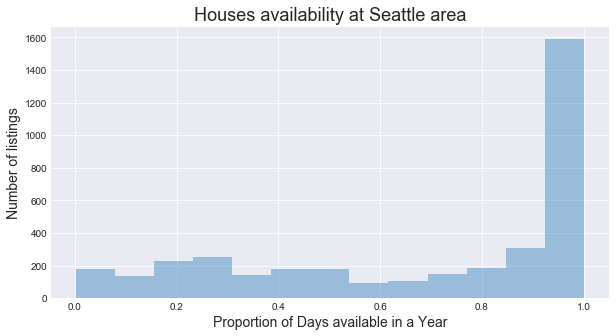

In [183]:
#Availability v/s Listing ID
sns.set_style("darkgrid")
plt.figure(figsize= (10,5))
sns.distplot(listing_availability.no_of_days_available/365, kde= False)
plt.xlabel("Proportion of Days available in a Year", fontsize =14)
plt.ylabel("Number of listings", fontsize = 14)
plt.title("Houses availability at Seattle area", fontsize = 18)
plt.show()

>There is a big spike in the last bar. As the numbers suggest, many listings remain unavailable throughout the year. We can
check some of them and try to understand the reasoning behind that.

In [185]:
#let's do some time series analysis.
seattle_calendars.month.value_counts()

October      118358
July         118358
March        118358
May          118358
December     118358
August       118358
April        114540
June         114540
January      114540
November     114540
September    114540
February     110722
Name: month, dtype: int64

In [196]:
#creating a month,weekday value field to sort the graph
seattle_calendars['month_value']=seattle_calendars.date.dt.strftime("%m")
seattle_calendars['weekday_value']=seattle_calendars.date.dt.strftime("%w")

seattle_calendars.head()

,listing_id,date,available,price,year,month,day_of_week,month_value,weekday_value
0,241032,2016-01-04,t,85.0,2016,January,Monday,01,1
1,241032,2016-01-05,t,85.0,2016,January,Tuesday,01,2
2,241032,2016-01-06,f,NaN,2016,January,Wednesday,01,3
3,241032,2016-01-07,f,NaN,2016,January,Thursday,01,4
4,241032,2016-01-08,f,NaN,2016,January,Friday,01,5


In [197]:
seattle_calendars.groupby(['year', 'month', 'available']).month.count().sort_values()

year  month      available
2017  January    f             1938
                 t             5698
2016  December   f            31297
      November   f            32760
      March      f            34420
      October    f            35920
      September  f            37294
      June       f            37296
      February   f            37401
      May        f            38387
      April      f            38503
      August     f            42011
      July       f            44136
      January    f            47665
                 t            59239
      February   t            73321
      July       t            74222
      April      t            76037
      August     t            76347
      June       t            77244
      September  t            77246
      May        t            79971
      November   t            81780
      October    t            82438
      March      t            83938
      December   t            87061
Name: month, dtype: int64

In [198]:
#we will consider the 2016 data for our analysis only to get a proper picture, as we dont have any data in 2017 apart from january.
seattle_calendars_2016 = seattle_calendars.query('year == "2016"')
seattle_calendars_2016.head()

,listing_id,date,available,price,year,month,day_of_week,month_value,weekday_value
0,241032,2016-01-04,t,85.0,2016,January,Monday,01,1
1,241032,2016-01-05,t,85.0,2016,January,Tuesday,01,2
2,241032,2016-01-06,f,NaN,2016,January,Wednesday,01,3
3,241032,2016-01-07,f,NaN,2016,January,Thursday,01,4
4,241032,2016-01-08,f,NaN,2016,January,Friday,01,5


In [199]:
#checking the occupancy in the seattle area in 2016
listings_by_month = pd.DataFrame(seattle_calendars_2016.query('available == "f" ').groupby(['month','month_value'])['listing_id'].count().reset_index())
listings_by_month.columns = ['month_name', 'month_value', 'count']
listings_by_month = listings_by_month.sort_values(by="month_value")
listings_by_month['per_listings'] = (listings_by_month['count']/np.sum(listings_by_month)[2])*100
listings_by_month

,month_name,month_value,count,per_listings
4,January,01,47665,10.427924
3,February,02,37401,8.182415
7,March,03,34420,7.530246
0,April,04,38503,8.423505
8,May,05,38387,8.398127
6,June,06,37296,8.159443
5,July,07,44136,9.655866
1,August,08,42011,9.190969
11,September,09,37294,8.159006
10,October,10,35920,7.858409


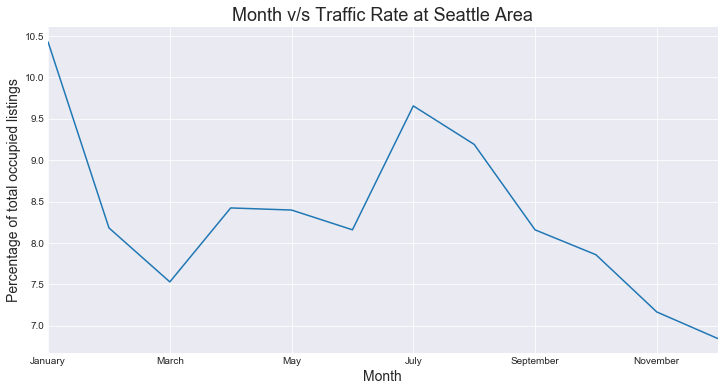

In [200]:
#Which month's show most occupancy and which month's show the least?
listings_by_month.set_index("month_name").per_listings.plot(figsize = (12,6))
plt.xlabel("Month", fontsize =14)
plt.ylabel("Percentage of total occupied listings", fontsize = 14)
plt.title("Month v/s Traffic Rate at Seattle Area", fontsize = 18)
plt.show()

>As we can see, January month sees the most number of occupancies. It might be because of travellers coming for a visit
as the new year starts and many other reasons. It shows a steady fall till March, and then there is an upward trend until
July. The weather is pleasant during that time for a visit also. After, July the listings occupancy rate slowly decreases.

In [201]:
listings_by_day_of_week = pd.DataFrame(seattle_calendars_2016.query('available == "f"').groupby(['weekday_value','day_of_week'])['listing_id'].count().reset_index())
listings_by_day_of_week.columns = ['weekday_value','day_of_week', 'count']
listings_by_day_of_week = listings_by_day_of_week.sort_values(by="weekday_value")
listings_by_day_of_week["per_weekday_listings"] = (listings_by_day_of_week['count']/np.sum(listings_by_month)[2])*100
listings_by_day_of_week.sort_index()

,weekday_value,day_of_week,count,per_weekday_listings
0,0,Sunday,64025,14.007088
1,1,Monday,65512,14.332407
2,2,Tuesday,65129,14.248616
3,3,Wednesday,65161,14.255617
4,4,Thursday,65568,14.344659
5,5,Friday,65733,14.380757
6,6,Saturday,65962,14.430856


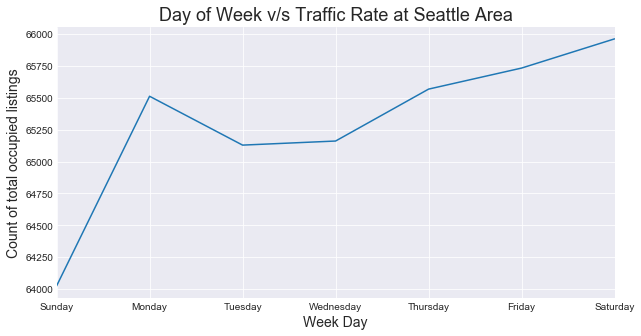

In [202]:
#Which day's show most occupancy and which month's show the least?
listings_by_day_of_week.set_index("day_of_week")['count'].plot(figsize = (10,5))
plt.xlabel("Week Day", fontsize =14)
plt.ylabel("Count of total occupied listings", fontsize = 14)
plt.title("Day of Week v/s Traffic Rate at Seattle Area", fontsize = 18)
plt.show()

>This graph shows a nice trend. If we see the occupancy rate across different days in a week, we see a nice trend. As the weekend comes closer, more people tend to book the houses. The number shows a steady rise till Saturday, and then again on Sunday's the average goes down.

In [203]:
#creating a dataframe joining our listings and calendars data to do some analysis on price
seattle_incomes = pd.merge(seattle_calendars[['listing_id','year','month','month_value','day_of_week','weekday_value','date','available']],seattle_listings_clean[['id','price']], how = 'inner',left_on ="listing_id", \
         right_on ="id")
seattle_incomes = seattle_incomes.drop('id', axis = 1)

In [204]:
seattle_incomes.head()

,listing_id,year,month,month_value,day_of_week,weekday_value,date,available,price
0,241032,2016,January,01,Monday,1,2016-01-04,t,85.0
1,241032,2016,January,01,Tuesday,2,2016-01-05,t,85.0
2,241032,2016,January,01,Wednesday,3,2016-01-06,f,85.0
3,241032,2016,January,01,Thursday,4,2016-01-07,f,85.0
4,241032,2016,January,01,Friday,5,2016-01-08,f,85.0


In [205]:
#some descriptive statistics for all the listings
seattle_incomes.describe().iloc[:,1]

count    1.393570e+06
mean     1.279762e+02
std      9.023823e+01
min      2.000000e+01
25%      7.500000e+01
50%      1.000000e+02
75%      1.500000e+02
max      1.000000e+03
Name: price, dtype: float64

>The maximum price per listings is $\$$1000 in the seattle area, whereas the minimum price is $\$$20. 
The average listing price is ~$\$$127. 50% of the listings are priced at $\$$100 or less.

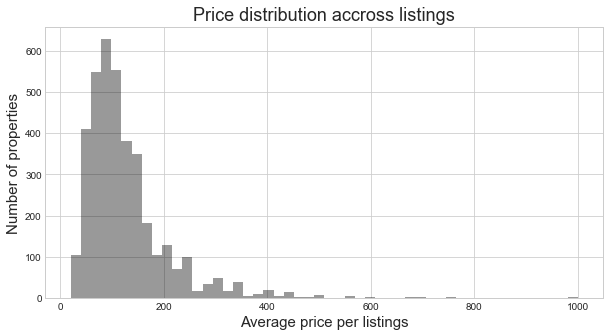

In [206]:
#let's see what is the averge price assoiciated with the listings irrespective of the availability?
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
avg_incomes_by_listing =seattle_incomes.groupby('listing_id').price.mean().sort_values(ascending=False).reset_index()
sns.distplot(avg_incomes_by_listing.set_index('listing_id'), kde = False, color='black')
plt.title("Price distribution accross listings", fontsize = 18)
plt.xlabel("Average price per listings", fontsize = 15)
plt.ylabel("Number of properties", fontsize = 15)
plt.show()

>As we can see from the distribution of price, the average price is mostly distributed between 0 and 200 dollars.
The maximum can go upto 1000 as seen before.

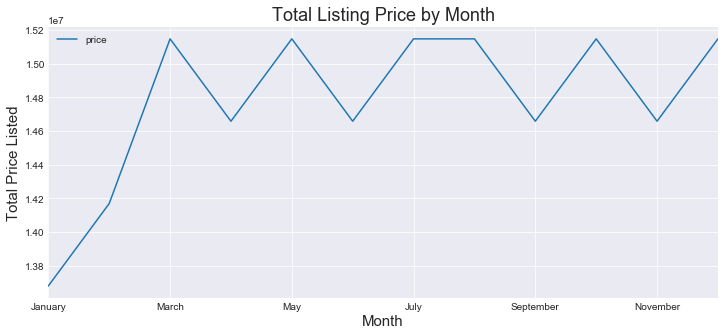

In [207]:
#let's see what is the averge price assoiciated with the listings irrespective of the availability?
tot_listed_prices_by_month =seattle_incomes.query('year == "2016" ').groupby(['month','month_value']).price.sum().sort_values(ascending=False).reset_index()
sns.set_style('darkgrid')
tot_listed_prices_by_month.sort_values(by="month_value").set_index('month').plot(figsize = (12,5))
plt.title("Total Listing Price by Month", fontsize = 18)
plt.xlabel("Month", fontsize = 15)
plt.ylabel("Total Price Listed", fontsize = 15)
plt.show()

In [208]:
tot_listed_prices_by_month.sort_values(by ="price", ascending = False)

,month,month_value,price
0,October,10,15147003.0
1,May,05,15147003.0
2,March,03,15147003.0
3,July,07,15147003.0
4,December,12,15147003.0
5,August,08,15147003.0
6,September,09,14658390.0
7,November,11,14658390.0
8,June,06,14658390.0
9,April,04,14658390.0


>Highest price is listed in the month of August and the price is ~$\$$15.1 Millions, the lowest price is listed in the month of January, valued at ~$\$$13.7 Million.

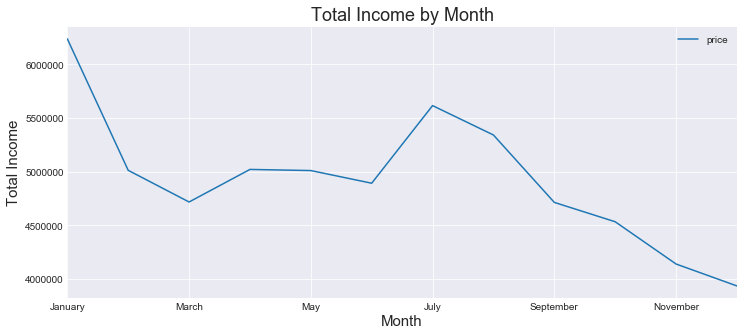

In [209]:
#let's see what is the total income assoiciated with the listings irrespective of the availability?
tot_incomes_by_month =seattle_incomes.query('year == "2016" and available == "f" ').groupby(['month','month_value']).price.sum().sort_values(ascending=False).reset_index()
sns.set_style('darkgrid')
tot_incomes_by_month.sort_values(by="month_value").set_index('month').plot(figsize = (12,5))
plt.title("Total Income by Month", fontsize = 18)
plt.xlabel("Month", fontsize = 15)
plt.ylabel("Total Income", fontsize = 15)
plt.show()

>If we see for all the listings the total price listed is lowest in January, even if it is the busiest month of the year.
But if we see only the occupied listings, we see a consistency with our earlier analysis. The airbnb hosts make most of 
their money in the month of January. The crowd dies down after January, so does the income. But there is a rise again in 
the month of July, August.

In [210]:
#let's see if the weekend sees a surge in price or not.
tot_incomes_by_day =seattle_incomes.query('year == "2016" and available == "f" ').groupby(['day_of_week','weekday_value']).price.sum().sort_values(ascending=False).reset_index()

In [211]:
tot_incomes_by_day.sort_values(by="price", ascending = False)

,day_of_week,weekday_value,price
0,Saturday,6,8540144.0
1,Friday,5,8525176.0
2,Thursday,4,8509916.0
3,Monday,1,8467722.0
4,Wednesday,3,8437700.0
5,Tuesday,2,8421508.0
6,Sunday,0,8281755.0


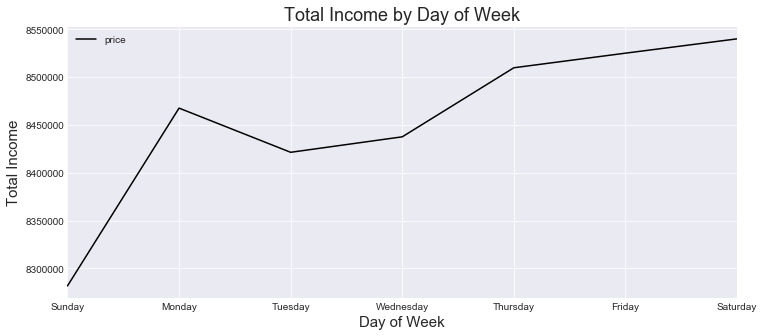

In [212]:
#plotting the results
sns.set_style('darkgrid')
tot_incomes_by_day.sort_values(by="weekday_value").set_index('day_of_week').plot(figsize = (12,5), color = "black")
plt.title("Total Income by Day of Week", fontsize = 18)
plt.xlabel("Day of Week", fontsize = 15)
plt.ylabel("Total Income", fontsize = 15)
plt.show()

> From this plot, we can clearly see, there is a surge in pricing during weekend. This is quite obvious as the demand
will be higher during that period, hence more chance of making better business.

<h3>Evaluate the results </h3>

Throughout the above notebook, we performed several data analysis operations to try and answer the questions we raised at
the begining. We could have done some machine learning modelling on top of this data, but that is not always necessary to
answer specific questions related to it.

<h4>Availability Analysis</h4>

**1. What percent of listings are highly available throughout the year?**

>As found out, of all the listings, 67% are available throughout the year, and 33% are mostly occuiped.
Entire homes or apartments highly available year-round for tourists, probably don't have the owner present, could be 
illegal, and more importantly, are displacing residents.
    
**2. How the listings are distributed across number of days? Are there more number of available listings? What could be the
reason behind that?**
>We plotted the availability against number of days. As the numbers suggest, many listings remain unavailable throughout the year. We looked at some of the listings, and found out the activity is less compared to the highly available listings.
The maximum reviews per month is 4.44 for highly available listings compared to 3.75 for less available listings. Most of those highly available listings are centered around the Seattle area . The picture shows the central area in Seattle.

<img src="images/central.JPG">

<h4>Time Series and Engagement Analysis</h4>

**1. What are the busiest times of the year to visit Seattle?**
>We saw, January month sees the most number of occupancies. It might be because of travellers coming for a visit
as the new year starts and many other reasons. It shows a steady fall till March, and then there is upwards trend untill
July. The weather is pleasant during that time for a visit also. After, July the listings occupancy rate slowly decreases.

**2. Which day is the busiest of all the days?**
>It seems Monday is the busiest of all the days.The traffic rate steadily remains low rest of the days.

<h4>Pricing Analysis </h4>

**1. How much do people charge to rent their homes (on average, minimum, maximum)?**
>We saw the maximum price for a listing goes upto $\$$1000 and also the lowest price goes to as low as $\$$20.
The average listing price is ~ $\$$127. 50% of the listings are priced at  $\$$100 or less.

**2. How the price changes in those busy schedules?**
>If we see for all the listings the total price listed is lowest in January, even if it is the busiest month of the year. But if we see only the occupied listings, we see a consistency with our earlier analysis. The airbnb hosts make most of their money in the month of January. The crowd dies down after January, so does the income. But there is a rise again in the month of July, August.
We also saw, there is a surge in pricing during weekend. This is quite obvious as the demand will be higher during that period, hence more chance of making better business.


<h3>Deploy</h3>

>The finding of the above analysis will be shared across world wide audience using a median post. Median is a great plaform for budding data scientists to showcase their work. The link to my blog is given below.
